# Classification task - Room occupancy 2

Some machine learning methods, namely Support Vector Machines, require standardized features. This means that every numerical feature should have zero mean and unit standard deviation. Implement normalization using standard Scikit-learn tools.

In [1]:
import pandas as pd
data = pd.read_csv('../data/occupancy.csv', sep=',')
data.head()

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Standardized classifier
Implement a classifier with standardized features.

### Data preparation

In [2]:
from sklearn.model_selection import train_test_split

X_all = data[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_all = data['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(
    X_all, 
    y_all,
    random_state=1,
    test_size=0.1)

print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 18504
Test size: 2056


### Training a standardized classifier

Implement a [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) classifier with feature standardization. Use standard Scikit-learn tools:
* [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
* [sklearn.pipeline.Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

Remember that standardization has to be estimated on the train set only and applied to both the train and test sets.


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.transform(X_train))

[[ 1.56232261  0.12340579  1.85724756  1.30720172  0.72263749]
 [ 0.75630516 -1.45641848  1.5814102   0.31046247 -1.24915524]
 [ 1.13560749  2.2136271   1.50650609  4.1882757   2.80899405]
 ...
 [-1.52899139  0.71151555 -0.55276245 -0.80986602  0.11585361]
 [ 3.12694473 -0.79761522  2.46242521  0.03599804  0.25393756]
 [ 0.46234585 -0.39150362 -0.61934388 -0.64615039 -0.23569747]]


In [4]:
print(scaler.transform(X_train)[:,0].mean())
print(scaler.transform(X_train)[:,0].std())

-6.124706352882403e-17
1.0


In [5]:
from sklearn import svm
from sklearn.pipeline import Pipeline
clf_pipeline = Pipeline([('std', StandardScaler()),
                         ('svm', svm.SVC(kernel='linear'))])

clf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

### Evaluate the models

Implement all evaluation methods you have learned in the Scikit-learn tutorial. Decide which model performs best on the given problem.

In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = clf_pipeline.predict(X_test)

print ("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print ()
print(metrics.classification_report(y_test, y_pred))

Test accuracy: 0.99

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1570
          1       0.96      0.99      0.97       486

avg / total       0.99      0.99      0.99      2056



In [7]:
y_pred = clf_pipeline.predict(X_train)

print ("Train accuracy: {:.2f}".format(accuracy_score(y_train, y_pred)))
print ()
print(metrics.classification_report(y_train, y_pred))

Train accuracy: 0.99

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     14240
          1       0.96      1.00      0.98      4264

avg / total       0.99      0.99      0.99     18504



In [8]:
from sklearn.metrics import confusion_matrix

y_pred = clf_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1549   21]
 [   7  479]]


In [9]:
from sklearn.model_selection import cross_val_score

folds = 10
acccuracies = cross_val_score(clf_pipeline, X_all, y_all, cv=folds, scoring='accuracy')
print('Cross-validated accuracy: {:.2f} with standard deviation {:.2f}'.format(acccuracies.mean(), acccuracies.std()))

Cross-validated accuracy: 0.99 with standard deviation 0.01


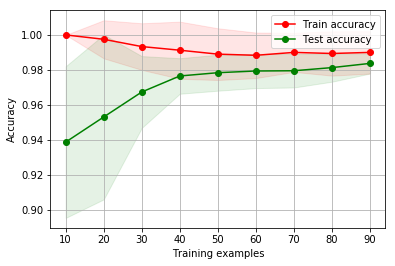

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit

cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
    clf_pipeline,
    X_all, y_all,
    train_sizes=range(10,99,10),
    n_jobs=-1,
    cv=cv,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test accuracy")

plt.xlabel("Training examples")

plt.ylabel("Accuracy")

plt.grid()

plt.legend(loc="best")

plt.show()